## Homework 4:

## Problem 2: Rejection Sampling
50 observations from a normal with known mean and unknown variance. We use a Inverse Gamma since the Inverse Gamma is conjugate for a normal liklihood. We know a t-distribution bounds our Inverse Gamma posterior for 
$$ p(\sigma^2|\bf{y})$$
where the location of the t is the mode and the scale is $\sqrt{.5}$. We find the optimal bounding function by solving
$$ M*t_{df=10}(mode,\sqrt{.5})=q(m|\bf{y})$$
where $q$ is the unnormalized posterior for $\sigma^2$.

### Part d:
- find this value of M that solves the eqn above

Refer to written homework for the explicit q and t. Below is the calculation of M:

In [1]:
# location scale t
dtcl= function(x, m, s, df) dt((x-m)/s, df)/s
sigma = seq(0,6,.001)

In [2]:
# calculate M for maximal bounded t-dist for the IG posterior for sigma square
M = (2.61^-28)*exp(-73.08/2.61)/dtcl(2.61,2.61,sqrt(.5),10)
M

[1] 2.711657e-24

In [3]:
# make bounded function mdt and IG
mdt = M*dtcl(sigma,2.61, sqrt(.5),10)
q= (sigma)^(-28)*exp(-73.08/sigma)

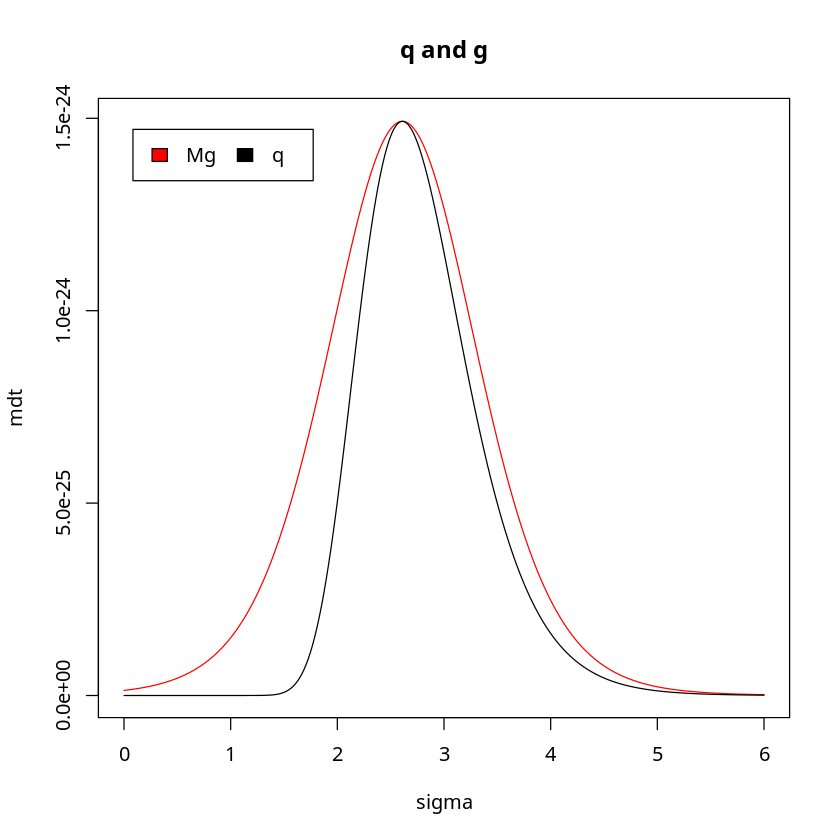

In [4]:
plot(sigma,mdt,type="l", col="red", main="q and g")
legend("topleft", inset=.05,
  	c("Mg","q"), fill=c("red","black"), horiz=TRUE)
lines(sigma,q,type="l")

### part e:
- Run the rejection sampling alg for 100 iterations using the bounded function found above. Keep track of the accepted and rejected points and plot them to verify:

In [5]:
B = 1000

qtarget <- function(sigma){
    (sigma)^(-28)*exp(-73.08/sigma)
}

gM <- function(sigma){
    M*dtcl(sigma,2.61,sqrt(.5),10)
}

rdtcl= function(n, df){
    (rt(n, df)*sqrt(.5)+2.61 )
}

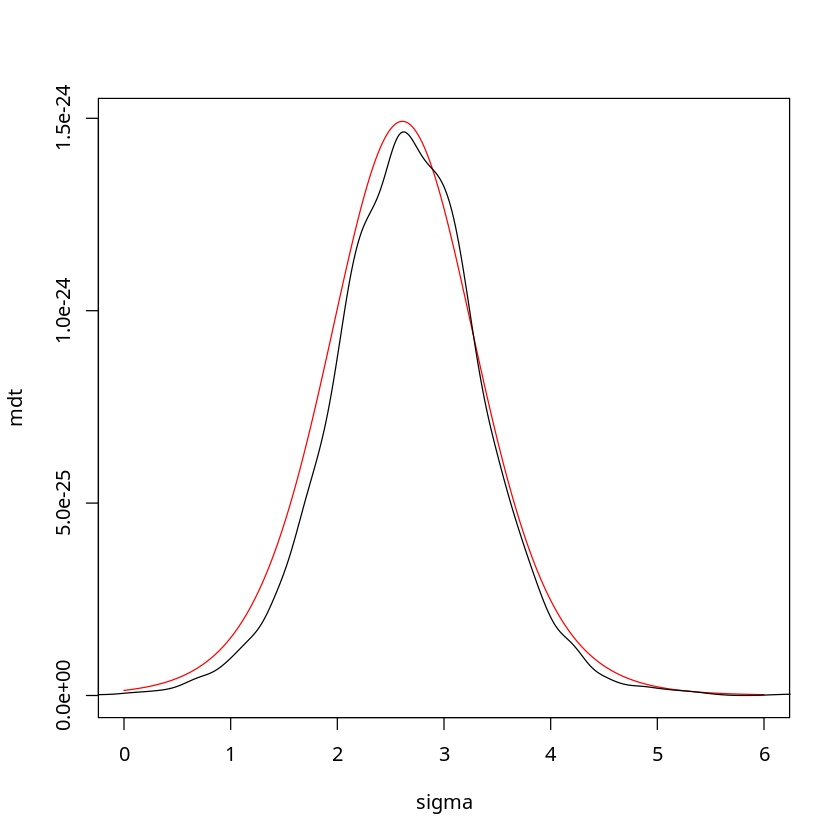

In [6]:
# 
plot(sigma,mdt,type="l", col="red", main="")
lines(c(do.call("cbind",density(rdtcl(6000,10))[1])),c(do.call("cbind",density(rdtcl(6000,10))[2]))*M)


- it appears as if we are appropriately sampling from the gM function.

In [7]:
B=100
accepted = numeric(B)
rejected = numeric(B)
aprobs = numeric(B)
rprobs = numeric(B)
i <- 0
j <- 0
while(i<B){
    x <- rdtcl(1,10)
    u = runif(1,0,gM(x))
    # must define samples of t stat that are less than zero as zero
    if(x<0) qt=0 else qt = qtarget(x)
    if(u <= qt){
        i = i+1
        accepted[i]=x
        aprobs[i]=u
    }else{
        j = j+1
        rejected[j] = x
        rprobs[j] = u
    }
}
        
        

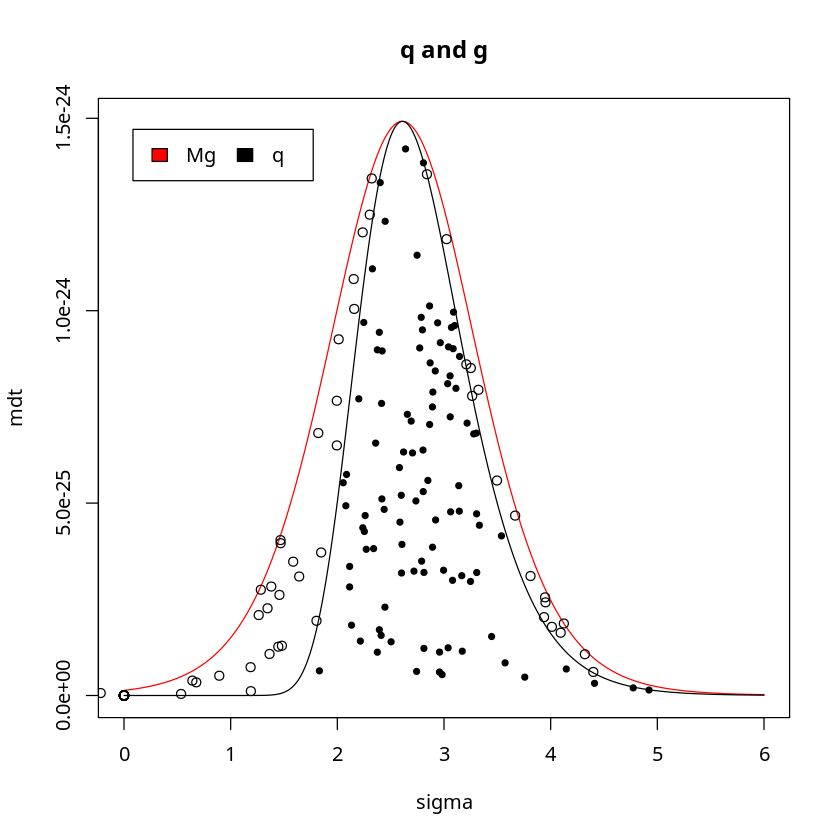

In [8]:
plot(sigma,mdt,type="l", col="red", main="q and g")
legend("topleft", inset=.05,
  	c("Mg","q"), fill=c("red","black"), horiz=TRUE)
lines(sigma,q,type="l")

points(accepted,aprobs, pch=20)
points(rejected,rprobs,pch=1)


### Part f:
- use rejection sampling to generate 10000 observations from the posterior of $\sigma^2$


In [9]:
B=10000
accepted = numeric(B)
rejected = numeric(B)
aprobs = numeric(B)
rprobs = numeric(B)
i <- 0
j <- 0
while(i<10000){
    x <- rdtcl(1,10)
    u = runif(1,0,gM(x))
    # must define samples of t stat that are less than zero as zero
    if(x<0) qt=0 else qt = qtarget(x)
    if(u <= qt){
        i = i+1
        accepted[i]=x
        aprobs[i]=u
    }else{
        j = j+1
        rejected[j] = x
        rprobs[j] = u
    }
}

In [10]:
# actual posterior density
# alpha* = alpha + n/2 beta* = beta + .5 *sum(yi-mu)^2
ig = function(theta,alpha, beta){
    (beta^alpha)/gamma(alpha)*theta^(-alpha-1)*exp(-beta/theta)
    
}

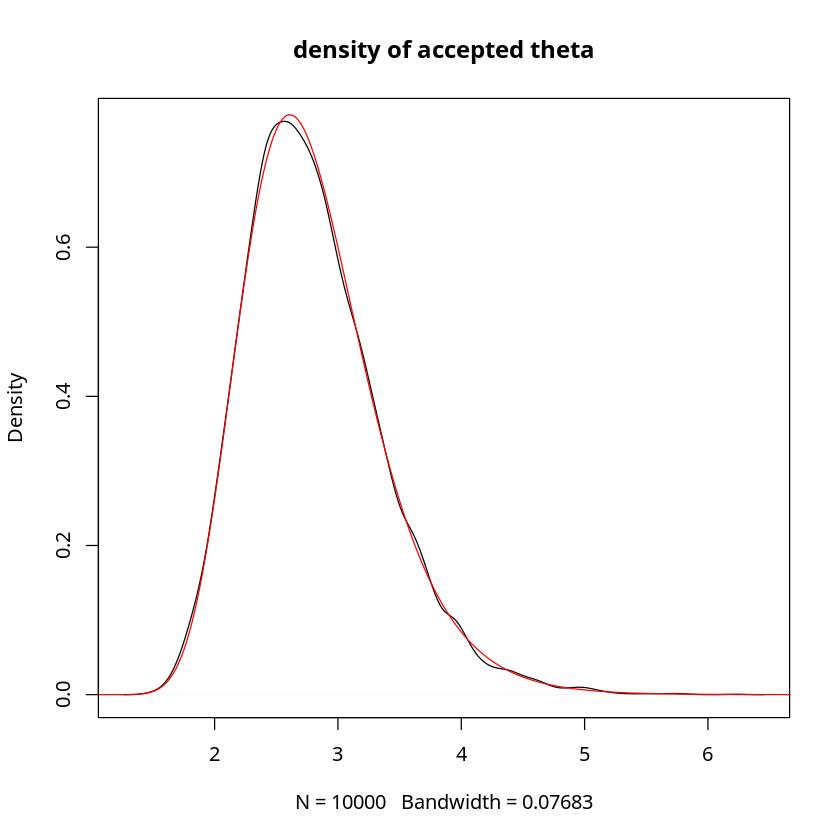

In [11]:
plot(density(accepted),main="density of accepted theta")
sigma = seq(0,8,.01)
lines(sigma, ig(sigma, 27, 73.08), col="red")

- we see that the approximated posterior found using rejection sampling is very close to the actual distribution that is inverge gamma which we know because the inverse gamma is conjugate for the normal distribution with unknow sigma and known mu.

### Part g:
- find the 95% central posterior confidence interval for sigma

In [12]:
quantile(accepted,probs=c(.025, .975))

2.5%    97.5% 
1.920543 4.076161

## Problem 3: Importance Sampling using $q(\theta|\bf{y})$

Suppose target has unnormalized density

$$ q(\theta|y)=exp(-(\theta-3)^2/2)$$

lets assume that the kernel is unknown and we want to estimate the mean and the variance. Let's use a t-distribution to find the correct $g$ function for our envelope function. We must find the location and scale parameters that make it a close fit to $q$.

[1] "final M and scale:"
[1] 3.146148
[1] 1.156375


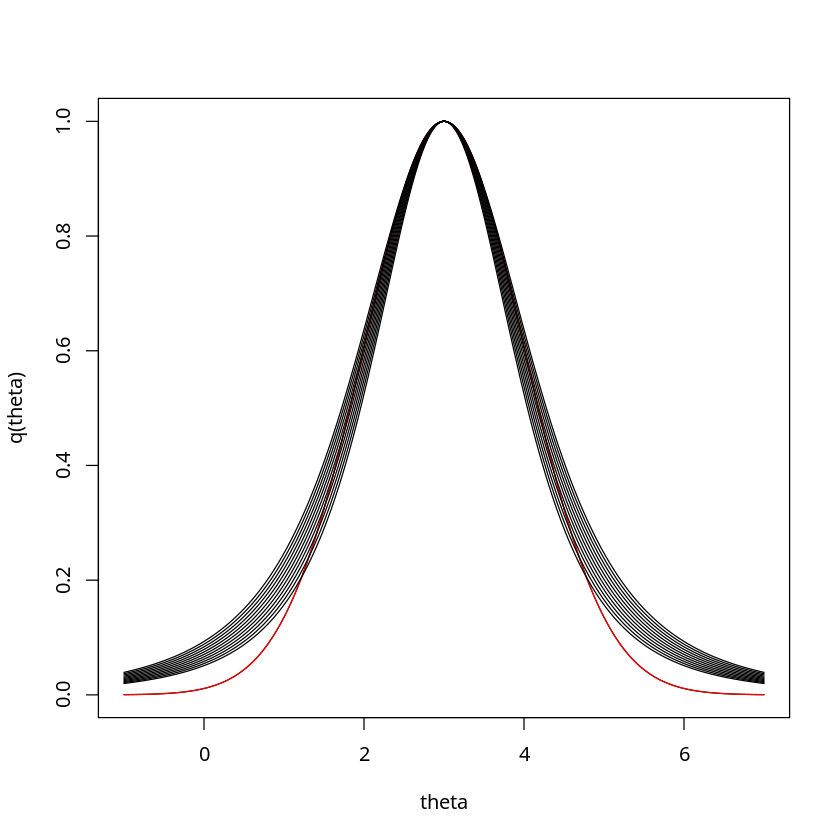

In [13]:
# plot q
theta = seq(-1,7,.01) 
q = function(x) exp(-(x-3)^2/2)
plot(theta,q(theta), type="l")

dtcl= function(x, m, s, df) dt((x-m)/s, df)/s
    
lines(theta, exp(-(theta-3)^2/2), col="red")    

s=seq(.3,2,length.out=length(theta))    
Ms = function(s) 1/dtcl(3,3,s,3)

Mg = function(s) Ms(s)*dtcl(theta, 3, s, 3)
 
for (scale in seq(300,400,10))    {
    lines(theta, Mg(s[scale]))
    #print(s[scale])
    #print(sum(Mg(s[scale])>exp(-(theta-3)^2/2)))
}

# 404th scale looks like its the closest without being less than target:    
    print("final M and scale:")
    print(Ms(s[404]))
    print(s[404])
    


- Playing with values we see that M=3.15 and s=1.15 (scale for t) the the best at hugging the target. We plot the final t3 on the actual, red, normal posterior


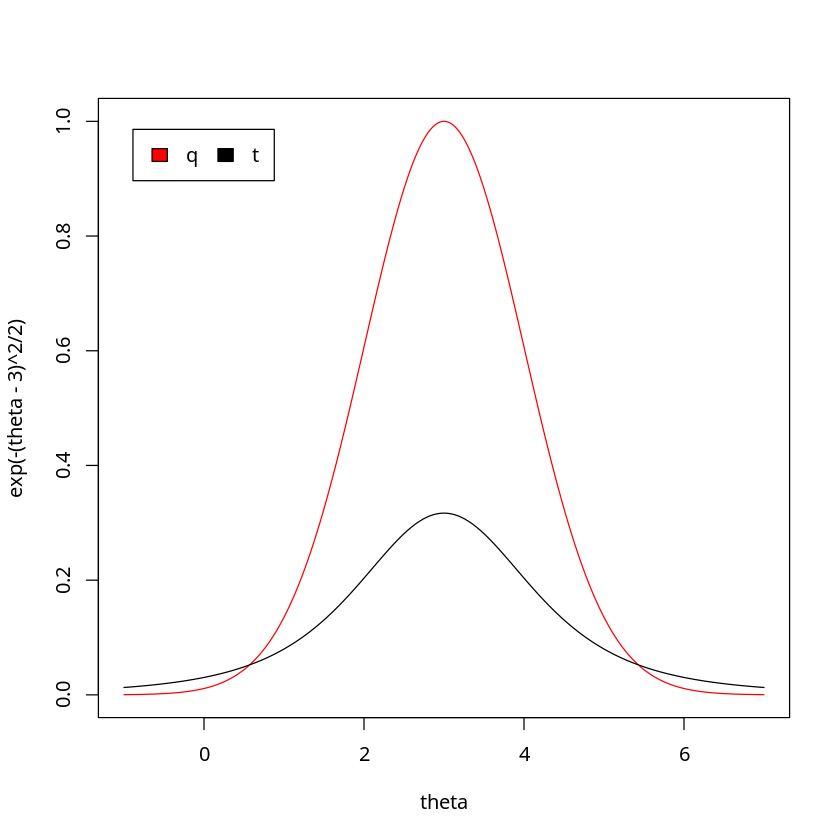

In [14]:
# plotting the actual and envelop t3
plot(theta, exp(-(theta-3)^2/2), col="red", type="l") 
legend("topleft", inset=.05,
  	c("q","t"), fill=c("red","black"), horiz=TRUE)
lines(theta, dtcl(theta,3,1.16,3))

### Part b:
- draw 10000 samples and calculate the importance ratios. plot a histogram of the log importance ratios. We want a negatively skewed dist to indicate there are not any large ratios; that is, we want small values of the ratio.


In [17]:
B = 10000
rdtcl= function(n,mu,scale, df){
    (rt(n, df)*scale+mu )
}
thetas <- rdtcl(B, 3, 1.16, 3)

# importance ratio function
impr = function(B,thetas){
    # g is multiplied by M
    q = exp(-(thetas-3)^2/2)
    g = dtcl(thetas, 3, sqrt(5/3),3)
    return(q/g)
    
}

In [18]:
iratios = impr(B,thetas)

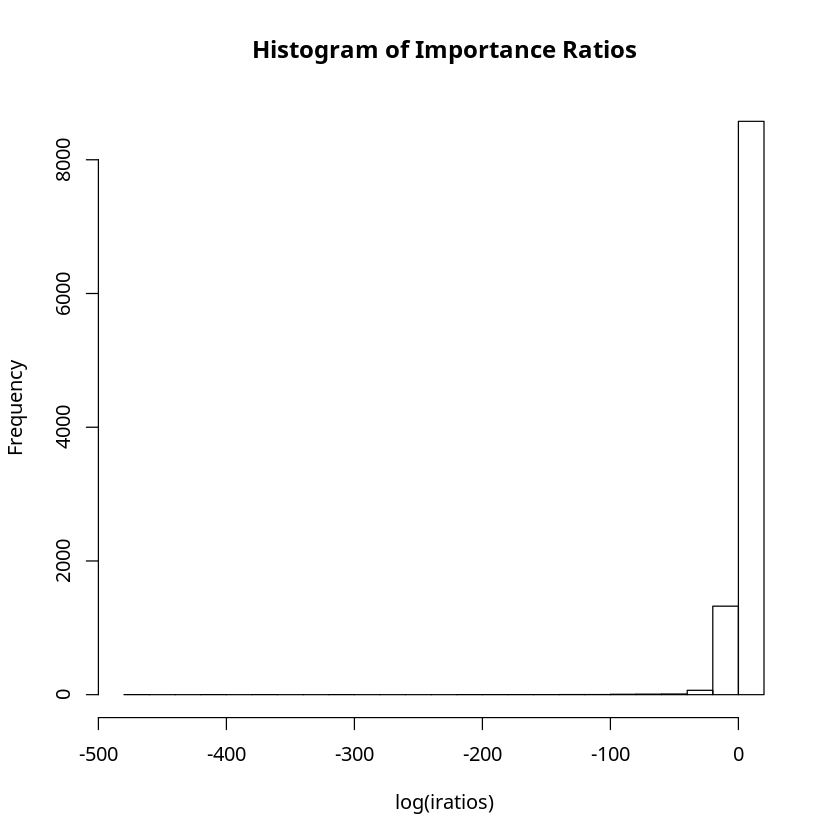

In [19]:
hist(log(iratios), main="Histogram of Importance Ratios",breaks=30)

It seems that we have a reasonably negatively skewed distribution of importance ratios. This is desired because it gives us some assurance that we do not have any significant difference in our envelope function and our target. That is, more ratios closer to 1 are ideal because they indicate that the envelope function/distribution is close to the target posterior distribution. 

### Part c:

g should be chosen so that w is large only when $h(\theta)$ is very small. Assume $h(\theta)=\theta$. Create a scatterplot of $\theta,w(\theta)$

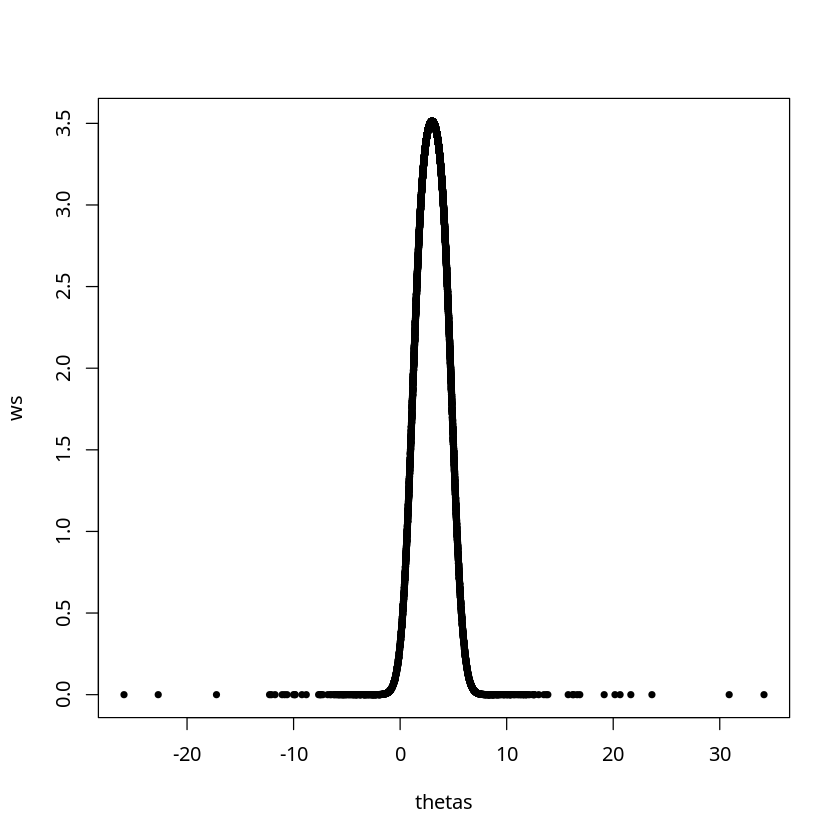

In [20]:
ws = impr(B, thetas)
plot(thetas, ws, pch=20)

### Part d:

- estimate $E(h(\theta|y))$ and $var(\theta|y)$

In [32]:
# estimate the variance of the target distribution

# mean 
h = thetas
muhat = sum(h*ws)/sum(ws)
cat("\n est mean:",muhat)
t = h * ws
w = ws
vvar = 1/B*(var(t) + 2*muhat^2*var(w) - 2 * muhat * cov(t, w))
cat("\n standard error:" ,sqrt(v))


# variance
h = (thetas-3)^2
muhat = sum(h*ws)/sum(ws)
cat("\n est var:" , muhat)
t = h * ws
w = ws
vvar = 1/B*(var(t) + 2*muhat^2*var(w) - 2 * muhat * cov(t, w))
cat("\n standard error" ,sqrt(v))






 est mean: 3.000013
 standard error: 0.03032105
 est var: 0.9999384
 standard error 0.03032105

Therefore, we see $E(h(\theta|y))=3.00$ and $var(\theta|y)=1.00$

### Part e:
The effective sample size is calculated by 
$$ \frac{1}{\sum(\bar{w}(\theta^s)^2}$$
where 
$$\bar{w} = w(\theta^s)S/\sum(w(\theta^{s'}))$$

In [44]:
# effective sample size:
wbar = ws/sum(ws)

seff = 1/sum(wbar^2)
seff




[1] 8213.405

## Problem 4: Importance Sampling Using $p(\theta|y)$

Importance sampling using the normalized target function. Assume it is a t, we will use a normal(0,1) as the envelope function and assess performance. 

### Part a:
- Draw 10,000 from proposal, N(3,1). and compute $w*$ for each.

In [55]:
# set up densities:
dtcl= function(x, m, s, df) dt((x-m)/s, df)/s


In [56]:
# drawing 10000 samples
B = 10000
samples = rnorm(B,3,1)

In [57]:
# Compute w*
wstar = dtcl(samples,3,1,3)/dnorm(samples,3,1)

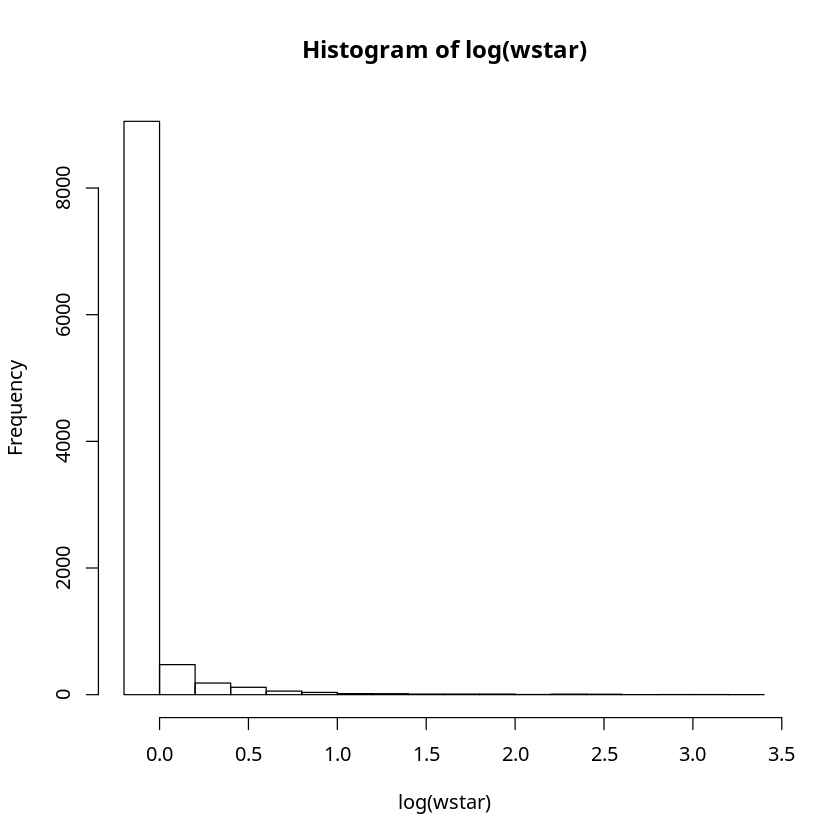

In [58]:
hist(log(wstar))



### Part b:
- assume $h(\theta)=(\theta-\mu)^2$ where $ \mu=3$. Create a scatterplot of w* vs h. Will this work well in estimating the variance?

In [59]:
# define h
h = (samples-3)^2

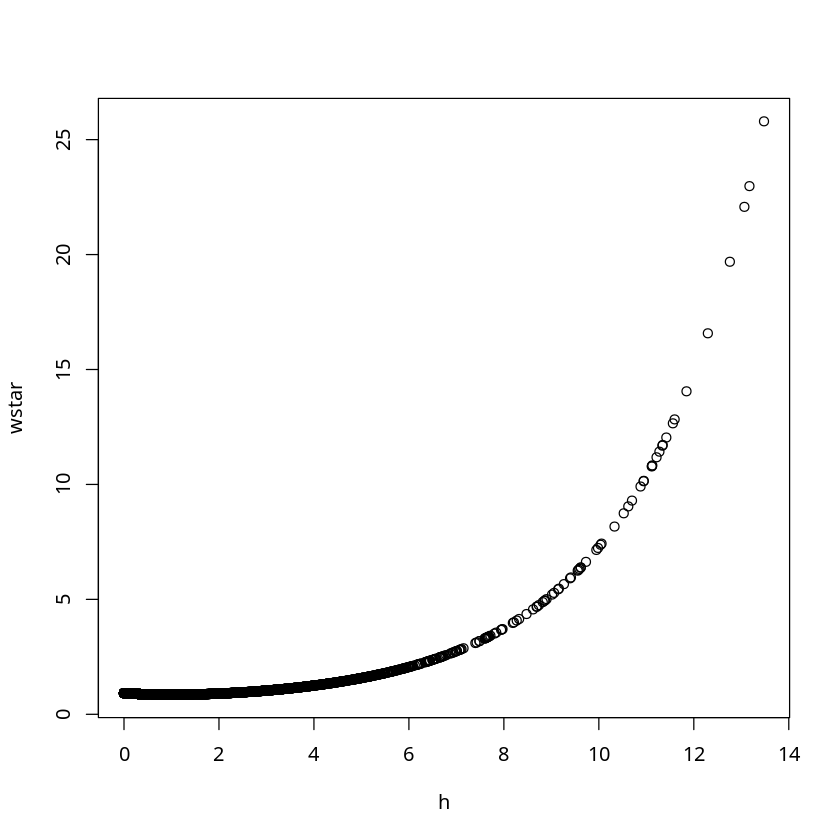

In [60]:
# make the scatterplot
plot(h,wstar)

### Part c:
- estimate the variance of the target distribution using the sample from part a. and calc the standard error.

In [61]:
# estimate the variance of the target distribution
muhat = sum(h*wstar)/sum(wstar)

muhat
t = h * wstar
w = wstar

v = 1/B*(var(t) + 2*muhat^2*var(w) - 2 * muhat * cov(t, w))
sqrt(v)


[1] 1.609994

[1] 0.07844882

### Part d:
- what is the effective sample size?


In [67]:
wbar = wstar/sum(wstar)
cv = sd(wbar)/mean(wbar)
                
eff = B/(1+cv^2)
eff



[1] 6556.069